# FinanceDataReader

## FinanceDataReader ???

* 한국 주식 가격, 미국주식 가격, 지수, 환율, 암호화폐 가격, 종목 리스팅 등 금융 데이터 수집 라이브러리

- [FinanceData/FinanceDataReader](https://github.com/FinanceData/FinanceDataReader)
- [FinanceDataReader 사용자 안내서](https://financedata.github.io/posts/finance-data-reader-users-guide.html)
- [Data Readers](https://pandas-datareader.readthedocs.io/en/latest/readers/index.html)

## 설치

In [ ]:
!pip install finance-datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.3/89.3 kB 2.5 MB/s eta 0:00:00


## 라이브러리

In [ ]:
import pandas as pd
import FinanceDataReader as fdr

fdr.__version__

'0.9.94'

## 한국거래소 상장종목 전체 가져오기

In [ ]:
# 도움말을 보고자 할때는 ? 를 사용하고 소스코드를 볼 때는 ??를 사용다.
# 주피터 노트북에서는 함수나 메소드의 괄호 안에서 shift + tab 키를 누르면 도움말을 볼 수 있다.

fdr.StockListing?

In [ ]:
# 종목 list
# KRX : KRX 종목 전체
# KOSPI : KOSPI 종목
# KOSDAQ : KOSDAQ 종목
# KONEX : KONEX 종목
# NASDAQ : 나스닥 종목
# NYSE : 뉴욕증권거래소 종목
# SP500 : S&P500 종목
df_krx = fdr.StockListing('KRX')
print(f'type(df_krx) = {type(df_krx)}')
print(f'len(df_krx) = {len(df_krx)}')
df_krx.head()

type(df_krx) = <class 'pandas.core.frame.DataFrame'>
len(df_krx) = 2844


,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,58300,2,-900,-1.52,59000,59600,58100,19083180,1121093971420,348038322665000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,182200,2,-4100,-2.20,182500,184900,180500,3478519,635191353700,132642030903000,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,412500,1,5000,1.23,405000,419000,404500,254445,105543486500,96525000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,998000,2,-4000,-0.40,995000,1011000,995000,42741,42850777000,71031652000000,71174000,STK
4,005380,KR7005380001,현대차,KOSPI,,213500,2,-1500,-0.70,212500,216500,211500,765177,163963604000,44710356778500,209416191,STK


In [ ]:
# 가끔 한국거래소에 서버점검 등의 이슈가 있어 fdr.StockListing 으로 상장종목을 받아오지 못할 때가 있다.
# 그럴 때는 아래의 주석을 해제하고 실습 !
# df_krx = pd.read_csv("https://raw.githubusercontent.com/corazzon/finance-data-analysis/main/krx.csv")

In [ ]:
# 행/열의 크기
df_krx.shape

(2844, 17)

In [ ]:
# 전체 데이터프레임 요약정보
df_krx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844 entries, 0 to 2843
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Code         2844 non-null   object 
 1   ISU_CD       2844 non-null   object 
 2   Name         2844 non-null   object 
 3   Market       2844 non-null   object 
 4   Dept         2844 non-null   object 
 5   Close        2844 non-null   object 
 6   ChangeCode   2844 non-null   object 
 7   Changes      2844 non-null   int64  
 8   ChagesRatio  2844 non-null   float64
 9   Open         2844 non-null   int64  
 10  High         2844 non-null   int64  
 11  Low          2844 non-null   int64  
 12  Volume       2844 non-null   int64  
 13  Amount       2844 non-null   int64  
 14  Marcap       2844 non-null   int64  
 15  Stocks       2844 non-null   int64  
 16  MarketId     2844 non-null   object 
dtypes: float64(1), int64(8), object(8)
memory usage: 377.8+ KB


In [ ]:
# 기술통계 값 요약
df_krx.describe()

,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks
count,2844.000000,2844.000000,2.844000e+03,2.844000e+03,2844.00000,2.844000e+03,2.844000e+03,2.844000e+03,2.844000e+03
mean,-195.048172,-0.943562,1.862043e+04,1.897539e+04,18233.31294,3.752524e+05,4.710956e+09,8.573319e+11,4.197041e+07
std,1298.589720,3.333402,5.227956e+04,5.355144e+04,51206.98213,1.885920e+06,3.017692e+10,7.785030e+12,1.329574e+08
min,-24500.000000,-38.250000,0.000000e+00,0.000000e+00,0.00000,0.000000e+00,0.000000e+00,6.003518e+08,2.000000e+05
25%,-140.000000,-2.172500,2.135000e+03,2.170000e+03,2113.75000,9.997000e+03,4.334386e+07,4.581323e+10,1.020623e+07
50%,-22.000000,-0.670000,5.055000e+03,5.155000e+03,4977.50000,4.571750e+04,2.089670e+08,1.005039e+11,1.977295e+07
75%,1.000000,0.080000,1.378250e+04,1.407250e+04,13545.00000,1.557622e+05,1.195298e+09,2.436788e+11,4.213514e+07
max,16500.000000,29.950000,1.009000e+06,1.070000e+06,995000.00000,5.562896e+07,1.121094e+12,3.480383e+14,5.969783e+09


In [ ]:
# 나스닥
df_nasdaq = fdr.StockListing('NASDAQ')
df_nasdaq.head()

100%|██████████| 3695/3695 [00:21<00:00, 175.38it/s]


,Symbol,Name,IndustryCode,Industry
0,AAPL,Apple Inc,57106020,전화 및 소형 장치
1,NVDA,NVIDIA Corp,57101010,반도체
2,MSFT,Microsoft Corp,57201020,소프트웨어
3,AMZN,Amazon.com Inc,53402010,백화점
4,META,Meta Platforms Inc,57201030,온라인 서비스


In [ ]:
df_nasdaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3695 entries, 0 to 3694
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Symbol        3695 non-null   object
 1   Name          3695 non-null   object
 2   IndustryCode  3695 non-null   object
 3   Industry      3695 non-null   object
dtypes: object(4)
memory usage: 115.6+ KB


## 파일로 저장하고 불러오기

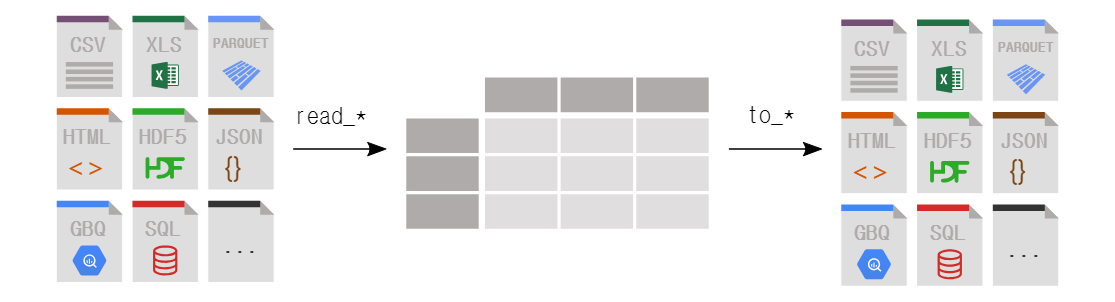

In [ ]:
# head 로 미리보기
df_krx.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,58300,2,-900,-1.52,59000,59600,58100,19083180,1121093971420,348038322665000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,182200,2,-4100,-2.20,182500,184900,180500,3478519,635191353700,132642030903000,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,412500,1,5000,1.23,405000,419000,404500,254445,105543486500,96525000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,998000,2,-4000,-0.40,995000,1011000,995000,42741,42850777000,71031652000000,71174000,STK
4,005380,KR7005380001,현대차,KOSPI,,213500,2,-1500,-0.70,212500,216500,211500,765177,163963604000,44710356778500,209416191,STK


In [ ]:
# to_csv로 Dataframe을 데이터 저장용 파일인 CSV 파일로
df_krx.to_csv("krx.csv", index=False)

In [ ]:
# CSV로 저장된 파일을 다시 DataFrame으로 읽어서 확인
pd.read_csv("krx.csv")

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,NaN,58300,2,-900,-1.52,59000,59600,58100,19083180,1121093971420,348038322665000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,NaN,182200,2,-4100,-2.20,182500,184900,180500,3478519,635191353700,132642030903000,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,NaN,412500,1,5000,1.23,405000,419000,404500,254445,105543486500,96525000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,NaN,998000,2,-4000,-0.40,995000,1011000,995000,42741,42850777000,71031652000000,71174000,STK
4,005380,KR7005380001,현대차,KOSPI,NaN,213500,2,-1500,-0.70,212500,216500,211500,765177,163963604000,44710356778500,209416191,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2839,236030,KR7236030003,씨알푸드,KONEX,일반기업부,1100,1,37,3.48,1100,1190,1000,20,22620,2236665200,2033332,KNX
2840,288490,KR7288490006,나라소프트,KONEX,일반기업부,59,3,0,0.00,60,60,55,6663,373471,1030823043,17471577,KNX
2841,413300,KR7413300005,티엘엔지니어링,KONEX,일반기업부,779,2,-71,-8.35,977,977,723,2267,1640619,1016996185,1305515,KNX
2842,308700,KR7308700004,테크엔,KONEX,일반기업부,199,0,0,0.00,0,0,0,0,0,796000000,4000000,KNX


## 주가 가져오기

- 국내 주식 : 005930(삼성전자), 091990(셀트리온헬스케어) 등
- 해외 주식 : NVDA(엔비디아), AAPL(애플), AMZN(아마존), GOOG(구글) 등
- 각종 지수 : KS11(코스피 지수), KQ11(코스닥 지수), DJI(다우 지수), IXIC(나스닥 지수), US500(S&P5000)
- 환율 데이터 : USD/KRX(원달러 환율), USD/EUR(달러당 유로화 환율), CNY/KRX(위완화 원화 환율)
- 암호 화폐 가격 : BTC/USD(비트코인 달러 가격, 비트파이넥스), BTC/KRW(비트코인 원화 가격, 빗썸)

In [ ]:
result = df_krx[df_krx['Name'] == '삼성전자']
print(result)

     Code        ISU_CD  Name Market Dept  Close ChangeCode  Changes  \
0  005930  KR7005930003  삼성전자  KOSPI       58300          2     -900   

   ChagesRatio   Open   High    Low    Volume         Amount           Marcap  \
0        -1.52  59000  59600  58100  19083180  1121093971420  348038322665000   

       Stocks MarketId  
0  5969782550      STK  


In [ ]:
df = fdr.DataReader('BTC/KRW', '2024') # symbol, start
df.tail(5)

,Open,High,Low,Close,Volume,Adj Close
2024-10-30,96679192.0,101871240.0,96492112.0,100669296.0,81041382522626,100669296.0
2024-10-31,100662200.0,100575520.0,98421680.0,99662824.0,55999228923425,99662824.0
2024-11-01,99656624.0,100097312.0,95582536.0,96462824.0,55815320550575,96462824.0
2024-11-02,96465176.0,98533904.0,94791456.0,95909432.0,69002914134606,95909432.0
2024-11-03,95722048.0,95722048.0,93781544.0,93781544.0,34376498806784,93781544.0


In [ ]:
# 삼성전자: Symbol - '000660' (code)
df = fdr.DataReader('005930', '2020-11-01', '2024-11-01') # symbol, start, end
df.head(5)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-11-02,56400,57500,56000,57400,20489076,0.014134
2020-11-03,57900,58900,57600,58800,14950919,0.024390
2020-11-04,58900,59000,57800,58500,21718561,-0.005102
2020-11-05,59000,60300,58800,60300,20639475,0.030769
2020-11-06,60700,60800,59600,60100,16910230,-0.003317


In [ ]:
# ndivia: Symbol - 'NVDA'
df = fdr.DataReader('NVDA', '2024') # symbol, start
df.tail(10)

,Open,High,Low,Close,Volume,Adj Close
2024-10-21,138.130005,143.710007,138.000000,143.710007,264554500,143.710007
2024-10-22,142.910004,144.419998,141.779999,143.589996,226311600,143.589996
2024-10-23,142.029999,142.429993,137.460007,139.559998,285930000,139.559998
2024-10-24,140.820007,141.350006,138.460007,140.410004,172354900,140.410004
2024-10-25,140.929993,144.130005,140.800003,141.539993,205122100,141.539993
2024-10-28,143.000000,143.139999,140.050003,140.520004,173586700,140.520004
2024-10-29,140.289993,142.259995,138.899994,141.250000,157593600,141.250000
2024-10-30,139.539993,140.330002,136.809998,139.339996,179418100,139.339996
2024-10-31,137.600006,137.610001,132.110001,132.759995,270039600,132.759995
2024-11-01,134.699997,137.309998,134.570007,135.399994,202737100,135.399994


## chart

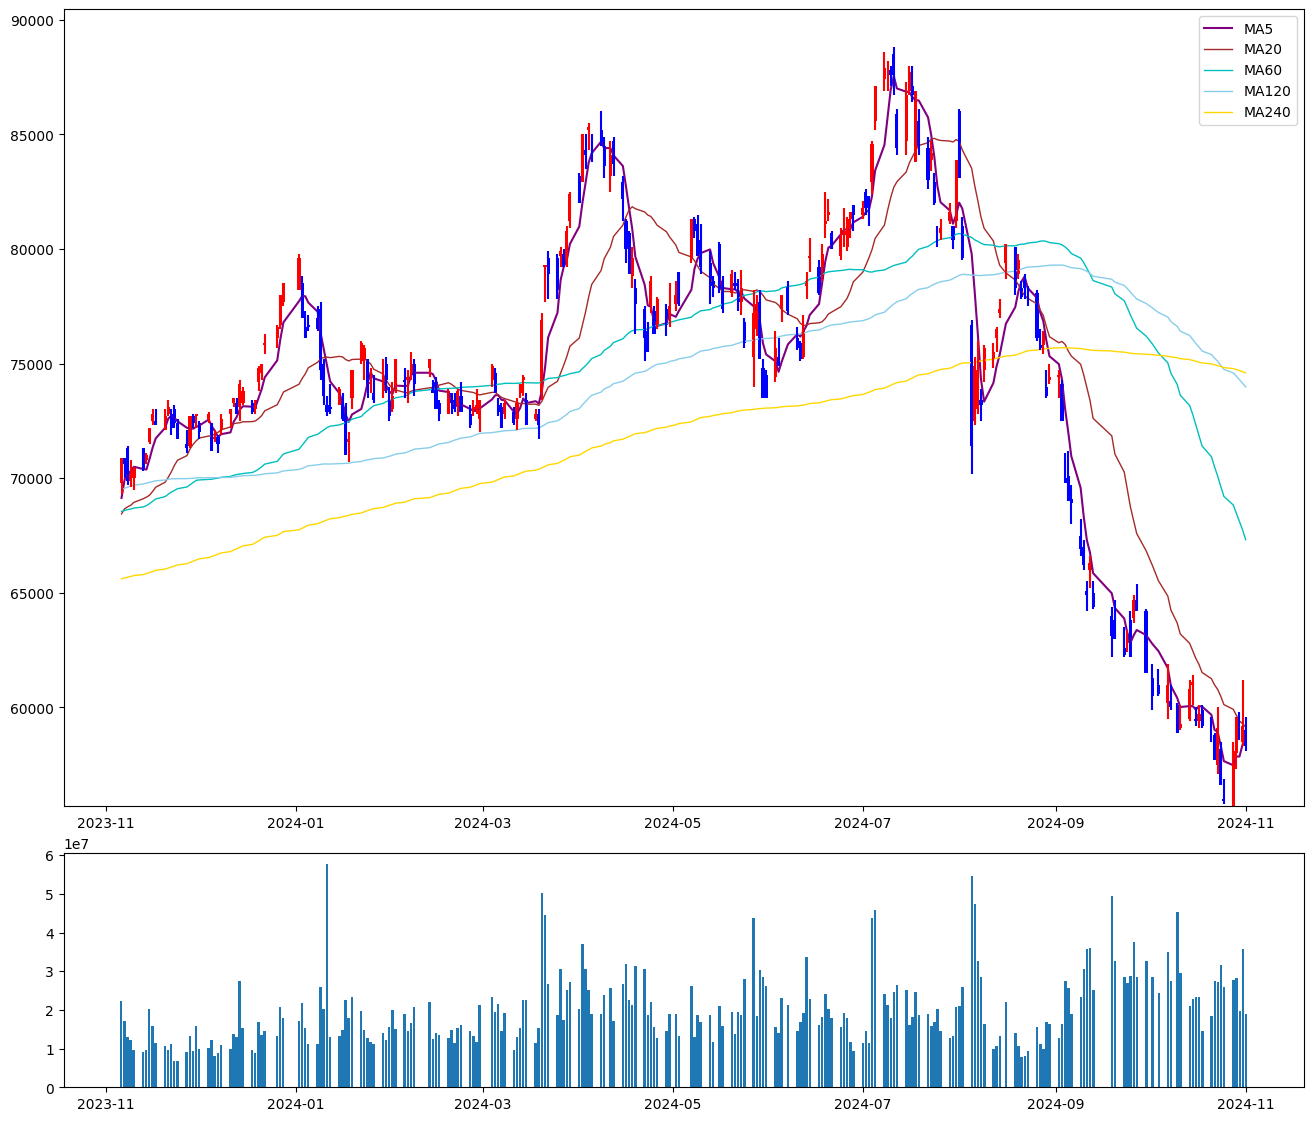

In [ ]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import sys

# 아래 두 코드만으로도 주식정보를 가지고 온다.
df_krx = fdr.StockListing('KRX')
df_krx.to_csv('stockList.csv', mode='w', encoding='utf-8-sig')

# 이름으로 코드를 찾기위한 단순한 함수
def codeFromName(name):
    nameList=list(df_krx['Name'])
    return df_krx['Code'][nameList.index(name)]

dayBfNum        = 1000 # 기간
strToday        = (datetime.datetime.today()).strftime("%Y%m%d")
strFromDay      = (datetime.datetime.today()-datetime.timedelta(dayBfNum)).strftime("%Y%m%d")
strShowFromDay  = (datetime.datetime.today()-datetime.timedelta(365)).strftime("%Y%m%d")

try:
    # 코드와 기간을 가지고 주식 가격정보를 가지고 올 수 있다니... 너무 편한데?
    strCode = codeFromName('삼성전자')
    df = fdr.DataReader(strCode, strFromDay, strToday)

    # 나는 파일로 저장해서 확인하는게 편하더라.
    #df.to_csv('stockDtlList.csv', mode='w', encoding='utf-8-sig')

    #이평선 데이터 추가
    ma5 = pd.DataFrame(  df['Close'].rolling(window=5).mean())
    ma20 = pd.DataFrame( df['Close'].rolling(window=20).mean())
    ma60 = pd.DataFrame( df['Close'].rolling(window=60).mean())
    ma120 = pd.DataFrame(df['Close'].rolling(window=120).mean())
    ma240 = pd.DataFrame(df['Close'].rolling(window=240).mean())

    df.insert(len(df.columns), '5일', ma5)
    df.insert(len(df.columns), '20일', ma20)
    df.insert(len(df.columns), '60일', ma60)
    df.insert(len(df.columns), '120일', ma120)
    df.insert(len(df.columns), '240일', ma240)

    # 날짜로 필터
    df = df[(df.index >= strShowFromDay)] # 이평선이 중간부터 표시되는게 싫어서, 앞부분 필터
    chart = df

    DateList = list(df.index )
    VolumeList = list(df['Volume'])
    CloseList = list(df['Close'])

    # 날짜 공백 처리하기
    df_date = pd.to_datetime(DateList)
    #df_date = df_date.strftime(' %m/%d ')

    fig = plt.figure(figsize=(16, 14))
    top_axes = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
    bottom_axes = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)

    top_axes.plot(chart.index,  chart['5일'], label='MA5'  , color='purple'   , linewidth= 1.5)
    top_axes.plot(chart.index, chart['20일'], label='MA20' , color='brown'  , linewidth= 1)
    top_axes.plot(chart.index, chart['60일'], label='MA60' , color='c'      , linewidth= 1)
    top_axes.plot(chart.index,chart['120일'], label='MA120', color='skyblue', linewidth= 1)
    top_axes.plot(chart.index,chart['240일'], label='MA240', color='gold' , linewidth= 1)
    top_axes.legend(loc="best")

    #top_axes.plot(chart.index,chart['Close'],linewidth= 1)

    top_axes.bar(chart.index, height=chart['Close']-chart['Open'], bottom=chart['Open'], width=1, color=list(map(lambda c: 'red' if c>0 else 'blue', chart['Change'] )))
    top_axes.vlines(chart.index, chart['Low'],chart['High'], color=list(map(lambda c: 'red' if c>0 else 'blue', chart['Change'] )))

    bottom_axes.bar(df_date, df['Volume'])

    #화면에 보여주기
    plt.show()

    #파일로 저장하기
    #plt.savefig(fname=f'{strToday}_{strCode}.png', bbox_inches='tight', pad_inches=0)

except:
    print('종목 이름도 모르면 그냥 끝내야지!')

# Pandas

In [ ]:
df = fdr.DataReader('005930', '2020-11-01', '2024-11-01') # '005930': 삼성전자 종목번호
df = df[['Open', 'High', 'Low', 'Volume', 'Close']]
df.tail(7)

,Open,High,Low,Volume,Close
Date,,,,,
2024-10-24,58200,58500,56600,31499922,56600
2024-10-25,56000,56900,55800,25829315,55900
2024-10-28,55700,58500,55700,27775009,58100
2024-10-29,58000,59600,57300,28369314,59600
2024-10-30,59100,59800,58600,19838511,59100
2024-10-31,58500,61200,58300,35809196,59200
2024-11-01,59000,59600,58100,18831511,58300


In [ ]:
df.index

DatetimeIndex(['2020-11-02', '2020-11-03', '2020-11-04', '2020-11-05',
               '2020-11-06', '2020-11-09', '2020-11-10', '2020-11-11',
               '2020-11-12', '2020-11-13',
               ...
               '2024-10-21', '2024-10-22', '2024-10-23', '2024-10-24',
               '2024-10-25', '2024-10-28', '2024-10-29', '2024-10-30',
               '2024-10-31', '2024-11-01'],
              dtype='datetime64[ns]', name='Date', length=985, freq=None)

In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Volume', 'Close'], dtype='object')

In [ ]:
print(type(df.iloc[0]))
df.iloc[0]

<class 'pandas.core.series.Series'>


,2020-11-02
Open,56400
High,57500
Low,56000
Volume,20489076
Close,57400


In [ ]:
print(type(df.iloc[:, 0]))
df.iloc[:, 0]

<class 'pandas.core.series.Series'>


,Open
Date,
2020-11-02,56400
2020-11-03,57900
2020-11-04,58900
2020-11-05,59000
2020-11-06,60700
...,...
2024-10-28,55700
2024-10-29,58000
2024-10-30,59100


In [ ]:
df_train_x = df.iloc[:, :-1]
print(type(df_train_x))
print(f'df_train.shape = {df_train_x.shape}')

np_train_x = df_train_x.to_numpy()
print(f'type(np_train) = {type(np_train_x)}')
print(f'np_train.shape = {np_train_x.shape}')

<class 'pandas.core.frame.DataFrame'>
df_train.shape = (985, 4)
type(np_train) = <class 'numpy.ndarray'>
np_train.shape = (985, 4)


In [ ]:
df_train_y = df.iloc[:, [-1]]
print(type(df_train_y))
print(f'df_train.shape = {df_train_y.shape}')

np_train_y = df_train_y.to_numpy()
print(f'type(np_train) = {type(np_train_y)}')
print(f'np_train.shape = {np_train_y.shape}')

<class 'pandas.core.frame.DataFrame'>
df_train.shape = (985, 1)
type(np_train) = <class 'numpy.ndarray'>
np_train.shape = (985, 1)


In [ ]:
print(type(df.iloc[4, [-1]]))
df.iloc[4, [-1]]

<class 'pandas.core.series.Series'>


,2020-11-06
Close,60100


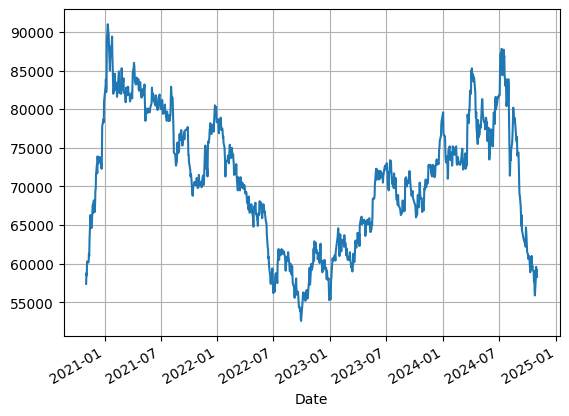

In [ ]:
df['Close'].plot().grid()

# MinMaxScaler()

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 1차원 array의 경우 reshape(-1, 1)을 이용 shape을 변경
data = np.array([1, 5, 7, 2, 9, 11]).reshape(-1,1)

# 최대값=1, 최소값=0으로 scaling
scaler = MinMaxScaler()
scaler.fit(data)  # data를 scaler로 변환하기 위한 함수 생성
scaled_data = scaler.transform(data)  # original data를 입력해 data를 변환
data = scaler.inverse_transform(scaled_data) #scaler로 변환된 data를 original data로 변환

print('==============================================')
print('original')
print('==============================================')
print(data)
print('==============================================')
print('scaled')
print('==============================================')
print(scaled_data)
print('==============================================')
print('original')
print('==============================================')
print(data)

original
[[ 1.]
 [ 5.]
 [ 7.]
 [ 2.]
 [ 9.]
 [11.]]
scaled
[[0. ]
 [0.4]
 [0.6]
 [0.1]
 [0.8]
 [1. ]]
original
[[ 1.]
 [ 5.]
 [ 7.]
 [ 2.]
 [ 9.]
 [11.]]


# 프로그램 개요

- 5일간의 data를 모아서 6일째 종가를 예측하는 프로그램

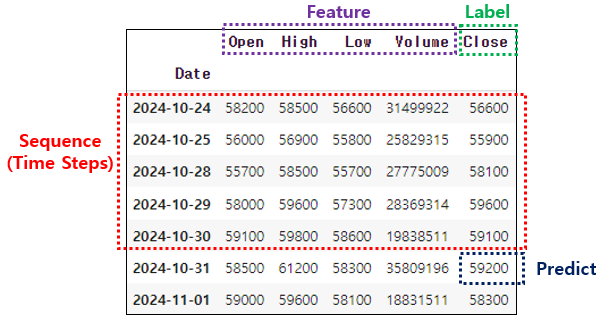

# 데이터 준비

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import FinanceDataReader as fdr
from sklearn.preprocessing import MinMaxScaler
import numpy as np

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f'torch.__version__ = {torch.__version__}, device = {device}')

# Hyper parameter
FEATURE_NUMS        = 4     # 입력층으로 들어가는 data의 수(Open, High, Low, Volume)
SEQ_LENGTH          = 5     # 정답을 만들기 위해 필요한 시점 수, time steps
HIDDEN_SIZE         = 4     # RNN layer를 구성하는 hidden state 수
NUM_LAYERS          = 1     # RNN layer가 몇 겹으로 쌓여 있는지
LEARNING_RATE       = 1e-3  # 학습률
BATCH_SIZE          = 20    # batch size
EPOCHS              = 200   # 학습 횟수
TRAINING_DATA_RATE  = 0.7   # 전체 data 중 train data의 비율

ModuleNotFoundError: No module named 'FinanceDataReader'

In [ ]:
# 2020년 이후 삼성전자 주가 가져오기
df = fdr.DataReader('005930', '2020-01-01', '2024-11-01') # '005930': 삼성전자 종목번호
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1191 entries, 2020-01-02 to 2024-11-01
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1191 non-null   int64  
 1   High    1191 non-null   int64  
 2   Low     1191 non-null   int64  
 3   Close   1191 non-null   int64  
 4   Volume  1191 non-null   int64  
 5   Change  1191 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 65.1 KB


In [ ]:
# 필요한 column만
df = df[['Open', 'High', 'Low', 'Volume', 'Close']]
df.tail(7)

,Open,High,Low,Volume,Close
Date,,,,,
2024-10-24,58200,58500,56600,31499922,56600
2024-10-25,56000,56900,55800,25829315,55900
2024-10-28,55700,58500,55700,27775009,58100
2024-10-29,58000,59600,57300,28369314,59600
2024-10-30,59100,59800,58600,19838511,59100
2024-10-31,58500,61200,58300,35809196,59200
2024-11-01,59000,59600,58100,19083180,58300


In [ ]:
# 7:3 비율로 train/test data 생성
# TRAINING_DATA_RATE  = 0.7   # 전체 data 중 train data의 비율
SPLIT = int(len(df) * TRAINING_DATA_RATE) # train : test = 7 : 3
df_train = df[:SPLIT]
df_test = df[SPLIT:]

In [ ]:
# Outlier의 영향을 최소화하기 위해 data를 0~1 사이의 값으로 정규화
# feature  scaling
scaler_x = MinMaxScaler()
scaler_x.fit(df_train.iloc[:, :-1])
df_train_x_scaled = scaler_x.transform(df_train.iloc[:, :-1])
df_test_x_scaled = scaler_x.transform(df_test.iloc[:, :-1])

# label scaling
scaler_y = MinMaxScaler()
scaler_y.fit(df_train.iloc[:, [-1]])
df_train_y_scaled = scaler_y.transform(df_train.iloc[:, [-1]])
df_test_y_scaled = scaler_y.transform(df_test.iloc[:, [-1]])

In [ ]:
# Sequence Data를 만들어 주는 함수
def MakeSequenceData(data_x, data_y, seq_length):
  seq_x = []
  seq_y = []

  for i in range(len(data_x) - seq_length):
    # featrue 4개인 data를 5일치를 모아서
    seq_x.append(data_x[i:i+seq_length, :]) # DataFrame
    # 이어지는 6일째의 종가
    seq_y.append(data_y[i+seq_length])      # Series

  return torch.FloatTensor(np.array(seq_x)).to(device), torch.FloatTensor(np.array(seq_y)).to(device)

# Sequence Length가 SEQ_LENGTH, 즉 time step 수가 SEQ_LENGTH인 train data, test data 생성
# tensor로 변경하기 위해 DataFrame => Numpy로 casting
train_x, train_y = MakeSequenceData(np.array(df_train_x_scaled), np.array(df_train_y_scaled), SEQ_LENGTH)
test_x, test_y = MakeSequenceData(np.array(df_test_x_scaled), np.array(df_test_y_scaled), SEQ_LENGTH)

print(f'train_x.shape = {train_x.shape}, train_y.shape = {train_y.shape}')
print(f'test_x.shape = {test_x.shape}, test_y.shape = {test_y.shape}')

train_x.shape = torch.Size([828, 5, 4]), train_y.shape = torch.Size([828, 1])
test_x.shape = torch.Size([353, 5, 4]), test_y.shape = torch.Size([353, 1])


In [ ]:
# Dataset 생성
train_dataset = TensorDataset(train_x, train_y)
test_dataset = TensorDataset(test_x, test_y)

# DataLoader 생성
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(f'len(train_dataloader) = {len(train_dataloader)}, len(test_dataloader) = {len(test_dataloader)}')

len(train_dataloader) = 42, len(test_dataloader) = 18


# Model 정의

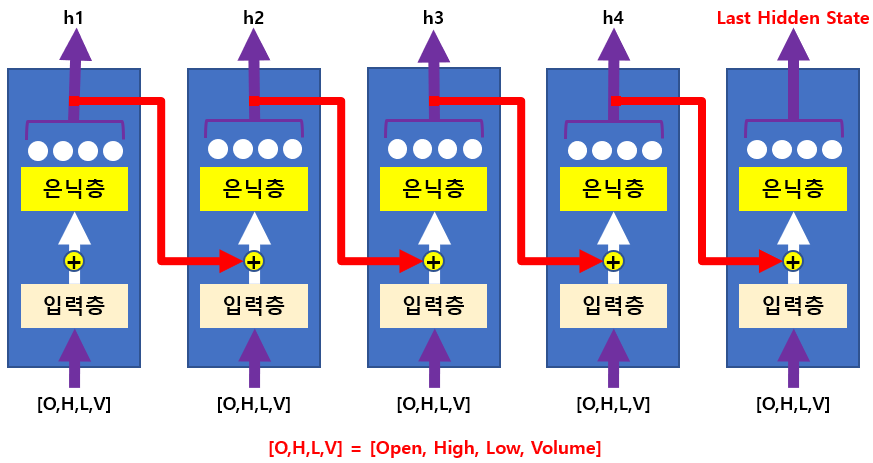

In [ ]:
# FEATURE_NUMS        = 4     # 입력층으로 들어가는 data의 수(Open, High, Low, Volume)
# SEQ_LENGTH          = 5     # 정답을 만들기 위해 필요한 시점 수, time steps
# BATCH_SIZE          = 20    # batch size
# HIDDEN_SIZE         = 4     # RNN layer를 구성하는 hidden state 수, RNN layer의 출력값의 수
# NUM_LAYERS          = 1     # RNN layer가 몇 겹으로 쌓여 있는지
# feature - 4, time_steps(sequence) - 5, batch-size: 20 => 입력 데이터 - (20, 5, 4)
class LstmModel(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers):
    super().__init__()
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
    self.fc = nn.Linear(hidden_size, 1)

  def forward(self, data):  # data.shape = torch.Size([20, 5, 4])
    # hidden state, cell state 초기화 (1, 20, 4)
    h0 = torch.zeros(self.num_layers, data.size(0), self.hidden_size).to(device)  # h0.shape = torch.Size([1, 20, 4])
    c0 = torch.zeros(self.num_layers, data.size(0), self.hidden_size).to(device)  # c0.shape = torch.Size([1, 20, 4])

    # outputs.size() - (batch_size=20, time_stpes=5, hidden_size=4)
    outputs, _ = self.lstm(data, (h0, c0))  # outputs.shape = torch.Size([20, 5, 4])
    # last_hs.size() - (batch_size=20, hidden_size=4)
    last_hs = outputs[:, -1, :] # 마지막 hidden state, last_hs.shape = torch.Size([20, 4])
    prediction = self.fc(last_hs) # prediction.shape = torch.Size([20, 1])

    return prediction

model = LstmModel(FEATURE_NUMS, HIDDEN_SIZE, NUM_LAYERS).to(device)
print(model)

criterion = nn.MSELoss()  # 주식 가격이므로
# LEARNING_RATE       = 1e-3  # 학습률
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

LstmModel(
  (lstm): LSTM(4, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)


## sample

In [ ]:
outputs = torch.rand(2, 5, 4)
print(outputs)
last_hs = outputs[:, -1, :]
print(last_hs)
fc = nn.Linear(4, 1)
prediction = fc(last_hs)
print(prediction)
print(f'outputs.shape = {outputs.shape}')
print(f'last_hs.shape = {last_hs.shape}')

tensor([[[0.9954, 0.8153, 0.7723, 0.5572],
         [0.2962, 0.8258, 0.4892, 0.0309],
         [0.1251, 0.9750, 0.5096, 0.5227],
         [0.8372, 0.6244, 0.5855, 0.6353],
         [0.5870, 0.5925, 0.0555, 0.1554]],

        [[0.5834, 0.6771, 0.2431, 0.4611],
         [0.7291, 0.6708, 0.9583, 0.7361],
         [0.9598, 0.3529, 0.5143, 0.7414],
         [0.2890, 0.5241, 0.2119, 0.0685],
         [0.6616, 0.9542, 0.4593, 0.2626]]])
tensor([[0.5870, 0.5925, 0.0555, 0.1554],
        [0.6616, 0.9542, 0.4593, 0.2626]])
tensor([[-0.8147],
        [-1.1128]], grad_fn=<AddmmBackward0>)
outputs.shape = torch.Size([2, 5, 4])
last_hs.shape = torch.Size([2, 4])


In [ ]:
input_data = torch.Tensor([[[58200,	58500,	56600,	31499922],
                            [56000,	56900,	55800,	25829315],
                            [55700,	58500,	55700,	27775009],
                            [58000,	59600,	57300,	28369314],
                            [59100,	59800,	58600,	19838511]]])
lstmModel = torch.nn.LSTM(
              input_size=4,  # 입력: 4, 4개의 feature
              hidden_size=4, # 출력: 4, 4개의 hidden state, 따라서 출력도 4개
              batch_first=True)

outputs, last_hs = lstmModel(input_data)
# outputs: LSTM의 모든 시점(timestamp)에서의 hidden state, [h1, h2, h3, h4, h5]
# outputs.size() - (batch_size, time_stpes, hidden_size) = (1, 5, 4)
# last_hs: 마지막 시점(timestamp)의 hidden state, [h5]
# last_hs.size() - (1, batch_size, hidden_size) = (1, 1, 4)

print(f'input_data.size() = {input_data.size()}') # input_data.size() = torch.Size([1, 5, 4]), (batch_size=3, time_steps=4, featrue=1)
print(f'outputs.size() = {outputs.size()}')       # outputs.size() = torch.Size([1, 5, 4]), (batch_size=1, time_stpes=5, hidden_size=4)
print(f'outputs = {outputs}')
print(f'last_hs.size() = {last_hs.size()}')       # last_hs.size() = torch.Size([1, 1, 4]), (num_layers=1, batch_size=3, hidden_size=3)
print(f'last_hs = {last_hs}')

# 학습

In [ ]:
def model_train(dataloader, model, criterion, optimizer):

  model.train()

  train_loss_sum = 0
  total_train_batch = len(dataloader)

  '''
  ### Debug ####################################
  index = 0
  ### Debug ####################################
  '''

  for inputs, labels in dataloader:
    x_train = inputs.to(device) # ['Open', 'High', 'Low', 'Volume']
    y_train = labels.to(device) # ['Close']

    outputs = model(x_train)
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_loss_sum += loss.item()

    '''
    ### Debug ####################################
    if index > 0:
      break
    index += 1

    # 20: batch size
    print(f'inputs.shape = {inputs.shape}')       # inputs.shape = torch.Size([20, 5, 4])
    print(f'labels.shape = {labels.shape}')       # labels.shape = torch.Size([20, 1])
    print(f'x_train.shape = {x_train.shape}')     # x_train.shape = torch.Size([20, 5, 4])
    print(f'y_train.shape = {y_train.shape}')     # y_train.shape = torch.Size([20, 1])
    print(f'y_train.type() = {y_train.type()}')   # y_train.type() = torch.FloatTensor
    print(f'y_train.size() = {y_train.size()}')   # y_train.size() = torch.Size([20, 1])
    print(f'y_train.size(0) = {y_train.size(0)}') # y_train.size(0) = 20
    print(f'outputs.shape = {outputs.shape}')     # outputs.shape = torch.Size([20, 1])
    ### Debug ####################################
    '''

  train_avg_loss = train_loss_sum / total_train_batch
  return train_avg_loss

'''
### Debug ####################################
model_train(train_dataloader, model, criterion, optimizer)
### Debug ####################################
'''

h0.shape = torch.Size([1, 20, 4])
c0.shape = torch.Size([1, 20, 4])
outputs.shape = torch.Size([20, 5, 4])
last_hs.shape = torch.Size([20, 4])
prediction.shape = torch.Size([20, 1])
inputs.shape = torch.Size([20, 5, 4])
labels.shape = torch.Size([20, 1])
x_train.shape = torch.Size([20, 5, 4])
y_train.shape = torch.Size([20, 1])
y_train.type() = torch.FloatTensor
y_train.size() = torch.Size([20, 1])
y_train.size(0) = 20
outputs.shape = torch.Size([20, 1])
h0.shape = torch.Size([1, 20, 4])
c0.shape = torch.Size([1, 20, 4])
outputs.shape = torch.Size([20, 5, 4])
last_hs.shape = torch.Size([20, 4])
prediction.shape = torch.Size([20, 1])


0.01173112825268791

In [ ]:
def model_eval(dataloader, model, criterion, optimizer):

  model.eval()

  with torch.no_grad():

    eval_loss_sum = 0
    total_batch_sum = len(dataloader)

    for inputs, labels in dataloader:
      x_eval = inputs.to(device)
      y_eval = labels.to(device)

      outputs = model(x_eval)
      loss = criterion(outputs, y_eval)

      eval_loss_sum += loss.item()

    eval_avg_loss = eval_loss_sum / total_batch_sum

  return eval_avg_loss

In [ ]:
from datetime import datetime

start_time = datetime.now()

train_loss_list = []
for epoch in range(EPOCHS):
  train_loss = model_train(train_dataloader, model, criterion, optimizer)
  train_loss_list.append(train_loss)
  if (epoch % 10 == 0 ):
    print(f'epoch: {epoch}, train_loss: {train_loss}')

end_time = datetime.now()
print(f'elapsed time => {end_time - start_time}')

epoch: 0, train_loss: 0.4350693215216909
epoch: 10, train_loss: 0.01549975367136843
epoch: 20, train_loss: 0.0029344312102434094
epoch: 30, train_loss: 0.0014190146328127455
epoch: 40, train_loss: 0.001170094798865085
epoch: 50, train_loss: 0.0010584777888392896
epoch: 60, train_loss: 0.0010030642969511626
epoch: 70, train_loss: 0.0009723780572780275
epoch: 80, train_loss: 0.0009515918541832694
epoch: 90, train_loss: 0.0009345644759291428
epoch: 100, train_loss: 0.0009192013156799865
epoch: 110, train_loss: 0.0009051731595675284
epoch: 120, train_loss: 0.0008922046094778038
epoch: 130, train_loss: 0.0008783791830258755
epoch: 140, train_loss: 0.0008608107974786046
epoch: 150, train_loss: 0.0008389999327066887
epoch: 160, train_loss: 0.0008159962346239592
epoch: 170, train_loss: 0.0007953402302865427
epoch: 180, train_loss: 0.0007784323412730979
epoch: 190, train_loss: 0.0007646251611904951
elapsed time => 0:00:19.630299


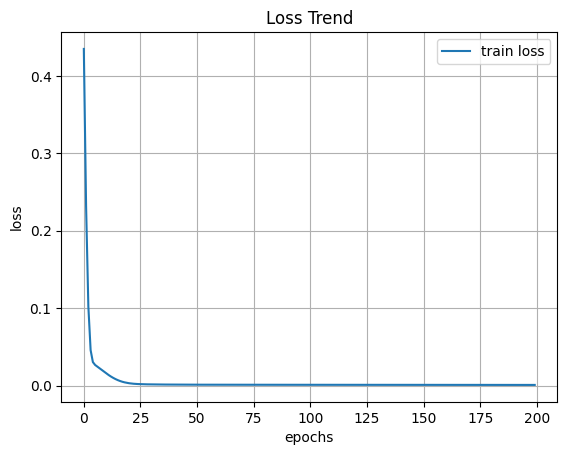

In [ ]:
import matplotlib.pyplot as plt

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.plot(train_loss_list, label='train loss')
plt.legend()
plt.show()

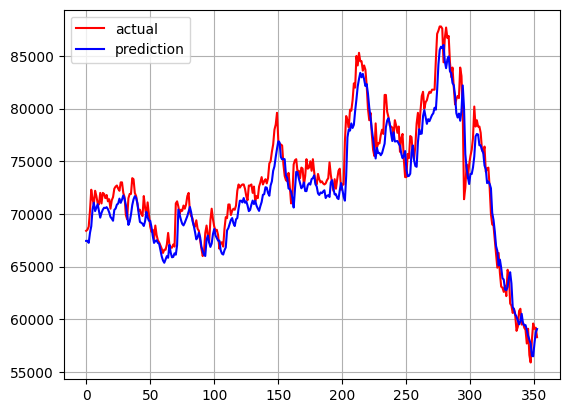

In [ ]:
# test data에 대한 예측 수행
predition = model(test_x).detach().cpu().numpy()

# scaling되기 전의 원래 값으로 변경
pred_price = scaler_y.inverse_transform(predition)

price = test_y.detach().cpu().numpy()
actual_price = scaler_y.inverse_transform(price)

plt.plot(actual_price, color='red', label='actual')
plt.plot(pred_price, color='blue', label='prediction')
plt.grid()
plt.legend()

plt.show()